In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
import datetime
import seaborn as sns
import pickle
%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import data_split
from stock_env import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline,trx_plot
from feature_engineer import FeatureEngineer
from models import DRLAgent
from portfolio_optimization_env import PortfolioOptimizationEnv
from pprint import pprint
import scienceplots
import sys
sys.path.append("../FinRL-Library")
import quantstats as qs
plt.style.use('science')
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])
from pandas import read_csv
df_dow =read_csv('./data/dow.csv')
df_nasdaq =read_csv('./data/nasdaq.csv')
df_hsi = read_csv('./data/hsi.csv')
df_dax = read_csv('./data/dax.csv')
df_sp500 = read_csv('./data/sp500.csv')

In [38]:
TRAIN_START_DATE = '2005-01-01'
TRAIN_END_DATE = '2006-12-30'
TEST_START_DATE = '2007-01-01'
TEST_END_DATE = '2008-12-30'
df_dow = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = DOW_30_TICKER).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Shape of DataFrame:  (28338, 8)


In [39]:
INDICATORS = [
    "close_5_ema",
]
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = True)

processed_dax = fe.preprocess_data(df_dow)
processed_dax = processed_dax.copy()
processed_dax = processed_dax.fillna(0)
processed_dax = processed_dax.replace(np.inf,0)
train_data = data_split(processed_dax, TRAIN_START_DATE, TRAIN_END_DATE)
test_data = data_split(processed_dax, TEST_START_DATE, TEST_END_DATE)
stock_dimension = len(train_data.tic.unique())
print(f"Stock Dimension: {stock_dimension}")

Successfully added technical indicators
Successfully added turbulence index
Successfully added user defined features
Stock Dimension: 28


In [51]:
result = benchmark(train_data,test_data,processed_dax,14000,1,['close','return'],INDICATORS,TEST_START_DATE,TEST_END_DATE)

TypeError: benchmark() takes 5 positional arguments but 9 were given

In [4]:
from utils import baseline


result_mvo = baseline(processed_dax,INDICATORS,TEST_START_DATE,TEST_END_DATE)

begin_total_asset:1000000
end_total_asset:1468978.6344728395
Sharpe:  0.5786892595237824
Test Finished!
episode_return 1.4689786344728395
begin_total_asset:1000000
end_total_asset:1204838.789844398
Sharpe:  0.31225039976830304
Test Finished!
episode_return 1.204838789844398
begin_total_asset:1000000
end_total_asset:1204838.789844398
Sharpe:  0.31225039976830304
Test Finished!
episode_return 1.204838789844398


In [36]:
dji = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = ['^dji']).fetch_data()

[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (2261, 8)


In [22]:
dji

,date,open,high,low,close,volume,tic,day
0,1992-01-02,3152.100098,3172.629883,3139.310059,3172.399902,23550000,^dji,3
1,1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,23620000,^dji,4
2,1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,27280000,^dji,0
3,1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,25510000,^dji,1
4,1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,29040000,^dji,2
...,...,...,...,...,...,...,...,...
4782,2010-12-22,11532.169922,11566.990234,11528.080078,11559.490234,122040000,^dji,2
4783,2010-12-23,11559.110352,11580.839844,11542.620117,11573.490234,100840000,^dji,3
4784,2010-12-27,11572.809570,11573.190430,11518.440430,11555.030273,76820000,^dji,0
4785,2010-12-28,11554.799805,11591.129883,11541.139648,11575.540039,114100000,^dji,1


In [37]:
dji.query("date >= '1992-01-01' & date <= '2006-01-01'").count()

date      1508
open      1508
high      1508
low       1508
close     1508
volume    1508
tic       1508
day       1508
dtype: int64

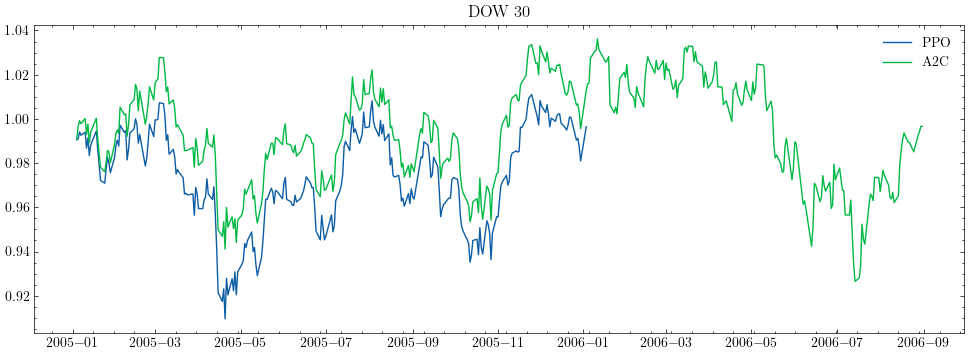

In [42]:
with plt.style.context('science','ieee'):
    plt.figure(figsize=(12,4))
    for i,item in enumerate(result): 
            plt.plot(item['train']['date'],(item['train']['portfolio_values'].pct_change()+ 1 ).cumprod(),label=str(item['name']).upper())
    plt.legend()
    plt.title('DOW 30')
    plt.show()

In [44]:
from utils import DRL_prediction
from portfolio_optimization_env import PortfolioOptimizationEnv


final_result = []
models = [
    {'name': 'ppo', 'args': {
        "n_steps": 2048,
        "ent_coef": 0.01,
        "learning_rate": 0.0003,
        "batch_size": 128,
    }},
    {'name': 'a2c', 'args': None},
    # {'name': 'sac', 'args': None}
]
env_kwargs = {
    "initial_amount": 100_0000,
    "normalize_df": None,
    "features": ['close','return'],
    'comission_fee_pct': 0.001,
}


result = {}
train_environment = PortfolioOptimizationEnv(df=train_data, **env_kwargs)
test_environment = PortfolioOptimizationEnv(df=test_data, **env_kwargs)
agent = DRLAgent(env=train_environment)
model = agent.get_model(
    'a2c', tensorboard_log='./data/tb')
ppo_model = agent.train_model(model=model,
                              tb_log_name = 'data/a2c',
                                total_timesteps=10000)
training_summary = pd.DataFrame(
    {
        "date": train_environment._date_memory,
        "actions": train_environment._actions_memory,
        "weights": train_environment._final_weights,
        "returns": train_environment._portfolio_return_memory,
        "rewards": train_environment._portfolio_reward_memory,
        "portfolio_values": train_environment._asset_memory["final"],
    }
)
prediction_summary = DRL_prediction(ppo_model, test_environment, 1)
result["train"] = training_summary
result["test"] = prediction_summary
result["name"] = 'a2c'
final_result.append(result)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./data/tb\data/a2c_1
---------------------------------------
| time/                 |             |
|    fps                | 42          |
|    iterations         | 100         |
|    time_elapsed       | 11          |
|    total_timesteps    | 500         |
| train/                |             |
|    entropy_loss       | -44.1       |
|    explained_variance | -0.66       |
|    learning_rate      | 0.0007      |
|    n_updates          | 99          |
|    policy_loss        | 0.0853      |
|    reward             | 0.004907942 |
|    std                | 1.11        |
|    value_loss         | 2.89e-05    |
---------------------------------------
Initial portfolio value:1000000
Final portfolio value: 1024206.625
Final accumulative portfolio value: 1.024206625
Maximum DrawDown: -0.13719198815403721
Sharpe ratio: 0.16593

In [59]:
train_data

,date,open,high,low,close,volume,tic,day,close_5_ema,turbulence,return
0,2005-01-03,1.156786,1.162679,1.117857,0.953359,691992000,AAPL,0,0.953359,0.000000,0.010270
0,2005-01-03,64.199997,64.680000,63.650002,45.204567,6657100,AMGN,0,45.204567,0.000000,0.010270
0,2005-01-03,49.541981,49.830830,48.841740,36.300587,5251571,AXP,0,36.300587,0.000000,0.010270
0,2005-01-03,51.849998,52.250000,50.919998,35.678841,3749900,BA,0,35.678841,0.000000,0.010270
0,2005-01-03,48.049999,48.575001,47.270000,28.668802,6294000,CAT,0,28.668802,0.000000,0.010270
...,...,...,...,...,...,...,...,...,...,...,...
502,2006-12-29,54.029999,54.230000,53.599998,34.982445,1736900,TRV,4,35.119522,15.015219,-0.008495
502,2006-12-29,53.400002,54.040001,53.400002,42.989227,4410400,UNH,4,42.746507,15.015219,0.001305
502,2006-12-29,34.886635,35.138695,34.681255,14.081416,10312501,VZ,4,14.008938,15.015219,-0.002144
502,2006-12-29,46.200001,46.360001,45.759998,26.911459,2788000,WBA,4,26.980077,15.015219,-0.003907


In [ ]:
train_data

In [ ]:
result = {}
train_environment = PortfolioOptimizationEnv(df=train_data, **env_kwargs)
test_environment = PortfolioOptimizationEnv(df=test_data, **env_kwargs)
agent = DRLAgent(env=train_environment)
model = agent.get_model(
    'ppo', tensorboard_log='./data/ppo')
ppo_model = agent.train_model(model=model,
                              tb_log_name = 'data/ppo',
                                total_timesteps=10000)
training_summary = pd.DataFrame(
    {
        "date": train_environment._date_memory,
        "actions": train_environment._actions_memory,
        "weights": train_environment._final_weights,
        "returns": train_environment._portfolio_return_memory,
        "rewards": train_environment._portfolio_reward_memory,
        "portfolio_values": train_environment._asset_memory["final"],
    }
)
prediction_summary = DRL_prediction(ppo_model, test_environment, 1)
result["train"] = training_summary
result["test"] = prediction_summary
result["name"] = 'ppo'
final_result.append(result)


{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 64}
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./data/ppo\data/ppo_1
Initial portfolio value:1000000
Final portfolio value: 1092944.0
Final accumulative portfolio value: 1.092944
Maximum DrawDown: -0.1033276619104797
Sharpe ratio: 0.47205088104758025
Initial portfolio value:1000000
Final portfolio value: 1053381.0
Final accumulative portfolio value: 1.053381
Maximum DrawDown: -0.11868686008921692
Sharpe ratio: 0.2970676532291772
Initial portfolio value:1000000
Final portfolio value: 1072621.75
Final accumulative portfolio value: 1.07262175
Maximum DrawDown: -0.13617791304444637
Sharpe ratio: 0.38213253147321696
Initial portfolio value:1000000
Final portfolio value: 1094515.25
Final accumulative portfolio value: 1.09451525
Maximum DrawDown: -0.1133165309022438
Sharpe ratio: 0.47866495953631083
-----------------------------------
| rollout/           

In [58]:
train_environment._date_memory

[Timestamp('2005-01-03 00:00:00'),
 Timestamp('2005-01-04 00:00:00'),
 Timestamp('2005-01-05 00:00:00'),
 Timestamp('2005-01-06 00:00:00'),
 Timestamp('2005-01-07 00:00:00'),
 Timestamp('2005-01-10 00:00:00'),
 Timestamp('2005-01-11 00:00:00'),
 Timestamp('2005-01-12 00:00:00'),
 Timestamp('2005-01-13 00:00:00'),
 Timestamp('2005-01-14 00:00:00'),
 Timestamp('2005-01-18 00:00:00'),
 Timestamp('2005-01-19 00:00:00'),
 Timestamp('2005-01-20 00:00:00'),
 Timestamp('2005-01-21 00:00:00'),
 Timestamp('2005-01-24 00:00:00'),
 Timestamp('2005-01-25 00:00:00'),
 Timestamp('2005-01-26 00:00:00'),
 Timestamp('2005-01-27 00:00:00'),
 Timestamp('2005-01-28 00:00:00'),
 Timestamp('2005-01-31 00:00:00'),
 Timestamp('2005-02-01 00:00:00'),
 Timestamp('2005-02-02 00:00:00'),
 Timestamp('2005-02-03 00:00:00'),
 Timestamp('2005-02-04 00:00:00'),
 Timestamp('2005-02-07 00:00:00'),
 Timestamp('2005-02-08 00:00:00'),
 Timestamp('2005-02-09 00:00:00'),
 Timestamp('2005-02-10 00:00:00'),
 Timestamp('2005-02-

In [61]:
train_environment._date_memory

[Timestamp('2005-01-03 00:00:00'),
 Timestamp('2005-01-04 00:00:00'),
 Timestamp('2005-01-05 00:00:00'),
 Timestamp('2005-01-06 00:00:00'),
 Timestamp('2005-01-07 00:00:00'),
 Timestamp('2005-01-10 00:00:00'),
 Timestamp('2005-01-11 00:00:00'),
 Timestamp('2005-01-12 00:00:00'),
 Timestamp('2005-01-13 00:00:00'),
 Timestamp('2005-01-14 00:00:00'),
 Timestamp('2005-01-18 00:00:00'),
 Timestamp('2005-01-19 00:00:00'),
 Timestamp('2005-01-20 00:00:00'),
 Timestamp('2005-01-21 00:00:00'),
 Timestamp('2005-01-24 00:00:00'),
 Timestamp('2005-01-25 00:00:00'),
 Timestamp('2005-01-26 00:00:00'),
 Timestamp('2005-01-27 00:00:00'),
 Timestamp('2005-01-28 00:00:00'),
 Timestamp('2005-01-31 00:00:00'),
 Timestamp('2005-02-01 00:00:00'),
 Timestamp('2005-02-02 00:00:00'),
 Timestamp('2005-02-03 00:00:00'),
 Timestamp('2005-02-04 00:00:00'),
 Timestamp('2005-02-07 00:00:00'),
 Timestamp('2005-02-08 00:00:00'),
 Timestamp('2005-02-09 00:00:00'),
 Timestamp('2005-02-10 00:00:00'),
 Timestamp('2005-02-

In [52]:
result = benchmark(train_data,test_data,10000,1,['close','return'])

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.0003, 'batch_size': 128}
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./data/tb\ppo_41
Initial portfolio value:1000000
Final portfolio value: 1086717.625
Final accumulative portfolio value: 1.086717625
Maximum DrawDown: -0.10668828616493775
Sharpe ratio: 0.4487203168946646
Initial portfolio value:1000000
Final portfolio value: 1025418.0625
Final accumulative portfolio value: 1.0254180625
Maximum DrawDown: -0.1367806655509034
Sharpe ratio: 0.17193165855678297
Initial portfolio value:1000000
Final portfolio value: 1042191.3125
Final accumulative portfolio value: 1.0421913125
Maximum DrawDown: -0.12207553111425584
Sharpe ratio: 0.24913574888616927
Initial portfolio value:1000000
Final portfolio value: 1065858.0
Final accumulative portfolio value: 1.065858
Maximum DrawDown: -0.11165595363142422
Sharpe ratio: 0.3553972915195334
-------------------------------------
| rollout/ 

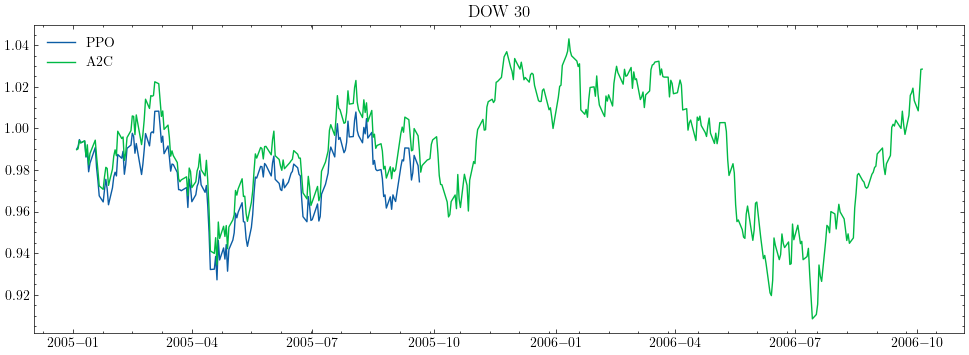

In [54]:
with plt.style.context('science','ieee'):
    plt.figure(figsize=(12,4))
    for i,item in enumerate(result): 
            plt.plot(item['train']['date'],(item['train']['portfolio_values'].pct_change()+ 1 ).cumprod(),label=str(item['name']).upper())
    plt.legend()
    plt.title('DOW 30')
    plt.show()

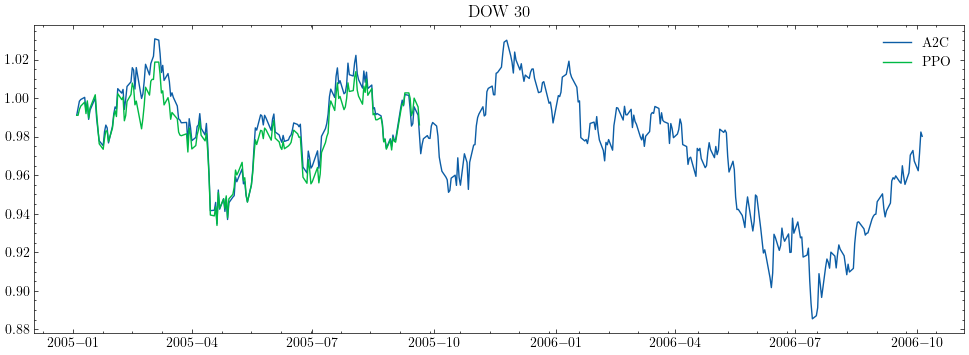

In [57]:
with plt.style.context('science','ieee'):
    plt.figure(figsize=(12,4))
    for i,item in enumerate(final_result): 
            plt.plot(item['train']['date'],(item['train']['portfolio_values'].pct_change()+ 1 ).cumprod(),label=str(item['name']).upper())
    plt.legend()
    plt.title('DOW 30')
    plt.show()